In [1]:
# этот ноутбук относится к лабе 2.2.6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

radius = 3
# import matplotlib.colors as mcolors
# print(mcolors.CSS4_COLORS.keys())
# for i in range(10):
#   plt.scatter(i, (i + 2) % 3,marker=(6,1, i*40), linewidths=2, s=1000, color='deeppink')

# plt.scatter(range(len(f_res)),  f_res, marker='$хуй$', linewidths=0.1)

микроскоп -- https://vostok-7.ru/catalog/mikroskopy_otschyetnye_po_brinellyu/mpb_3_mikroskop_otschyetnyy_brinell/

расстояние между рисками -- 10.0, 9.8

In [2]:
d = np.array((2.2, 2.1, 0.8, 0.7, 1.9, 2.1, 0.75, 0.85, 2, 2.1, 0.85, 0.7,
2.1, 2.0, 0.9, 0.7, 2.1, 2.0, 0.8, 0.75, 2.0, 0.6, 0.6, 2.0)) # мм

In [3]:
# v ~ r*r/eta ~ 1/t
#temp = 22.30
t = (33.81, 35.66, 38.99, 43.63, 33.85) # с
#temp = 30.40                          30.90
t2 = (26.63, -1, 26.05, 19.6, 17.8, 23.93, 22.26) # с
#   temp:      40.92         40.85  40.80
t3 = (10.91, 10.35, 11.81, 16.20)
#   temp:      50.93 50.97  50.89
t4 = (6.95, 6.33,  7.60,  7.70)
#   temp:60.93     60.79 
t5 = (3.20,  7.63, 6.20, 2.80)

In [4]:
temp = (22.30, 22.30, 22.30, 22.30, 22.30,
30.40, 30.40, 30.40, 30.40, 30.40, 30.90, 30.90,
40.92, 40.92, 40.85, 40.80,
50.93, 50.97, 50.89, 50.89,
60.93, 60.93, 60.79, 60.79)

In [159]:
a = pd.DataFrame()
a['diametr'] = d
a['time'] = t + t2 + t3 + t4 + t5
a['temp'] = temp
a['rho'] = a['temp'] / 2500 + 317/250 
a['v'] = 10 / a['time']
a['Re'] = a['v'] * radius * a['rho']
a['rho_ball'] = a['diametr']
for i in range(len(a['rho_ball'])):
  a['rho_ball'][i] = (7.7 if a['rho_ball'][i] > 1 else 2.6)
a['Nu'] = 0.222 * 9.81 * radius ** 2 * (7.7 - a['rho']) / a['v']
a['Nu_advanced'] = a['Nu'] / (1 + 2.4 * (a['diametr'] / (2 * radius)))
a = a.drop(labels=6)
a

,diametr,time,temp,rho,v,Re,rho_ball,Nu,Nu_advanced
0,2.20,33.81,22.30,1.276920,0.295770,1.133026,7.7,425.650348,226.409760
1,2.10,35.66,22.30,1.276920,0.280426,1.074246,7.7,448.940888,243.989613
2,0.80,38.99,22.30,1.276920,0.256476,0.982498,2.6,490.863859,371.866560
3,0.70,43.63,22.30,1.276920,0.229200,0.878011,2.6,549.279051,429.124258
4,1.90,33.85,22.30,1.276920,0.295421,1.131687,7.7,426.153928,242.132913
5,2.10,26.63,30.40,1.280160,0.375516,1.442163,7.7,335.088761,182.113457
7,0.85,26.05,30.40,1.280160,0.383877,1.474273,2.6,327.790546,244.619810
8,2.00,19.60,30.40,1.280160,0.510204,1.959429,7.7,246.629355,137.016308
9,2.10,17.80,30.40,1.280160,0.561798,2.157573,7.7,223.979720,121.728109
10,0.85,23.93,30.90,1.280360,0.417885,1.605132,2.6,301.104929,224.705171


<BarContainer object of 23 artists>

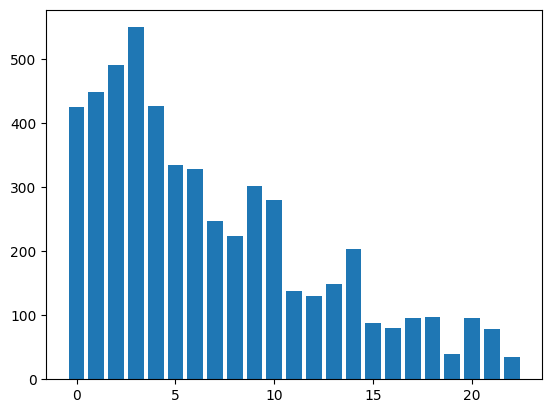

In [147]:
plt.bar(
  range(len(a['Nu'])),
  a['Nu']
)

5.927289928713396


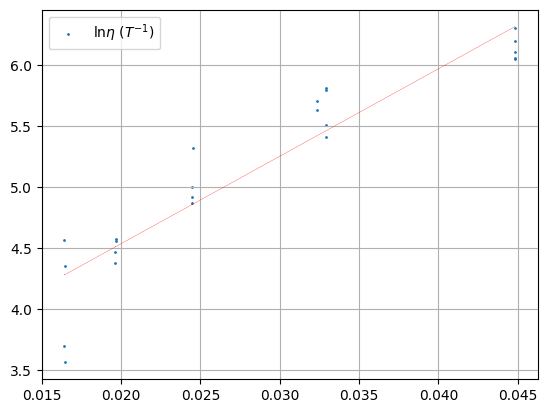

In [160]:
oy = np.log(a['Nu'])
ox = 1 / a['temp']
# ox = a["Nu"]
plt.scatter(
  ox,
  oy,
  s=1,
  label="ln$\eta \ (T^{-1})$"
)

z1, res= np.polyfit(ox, oy, 1, full=False, cov=True)
p1 = np.poly1d(z1)
plt.plot(ox, p1(ox), linewidth=0.2, color='red', linestyle='-')
print(res[0][0] ** 0.5)
plt.grid()
plt.legend(loc='best')
plt.show()